<a href="https://colab.research.google.com/github/Athreya99/Analytics/blob/main/CustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import random
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier



np.random.seed(0)

url = 'https://raw.githubusercontent.com/coen2812023/Classification/main/customer_churn.csv'
df = pd.read_csv(url, index_col=0)




In [ ]:
df.head()

,age,gender,tenure,balance,products,credit_score,active_member,estimated_salary,location,phone,loan,security_deposit,cd_account,online_banking,churned
customer_id,,,,,,,,,,,,,,,
1,62,Female,106,18191,3,584,1,111941,Canada,Android,1,0,1,1,1
2,65,Male,238,3121,4,624,0,52957,Mexico,Android,1,1,0,1,0
3,71,Male,119,13585,5,326,0,68870,Canada,iOS,1,0,0,1,0
4,18,Male,25,4886,5,524,0,59849,Mexico,Android,0,1,1,0,1
5,21,Female,124,9922,3,548,1,98727,USA,Android,1,0,0,1,0


In [ ]:
df.reset_index(inplace=True)

In [ ]:
df

,customer_id,age,gender,tenure,balance,products,credit_score,active_member,estimated_salary,location,phone,loan,security_deposit,cd_account,online_banking,churned
0,1,62,Female,106,18191,3,584,1,111941,Canada,Android,1,0,1,1,1
1,2,65,Male,238,3121,4,624,0,52957,Mexico,Android,1,1,0,1,0
2,3,71,Male,119,13585,5,326,0,68870,Canada,iOS,1,0,0,1,0
3,4,18,Male,25,4886,5,524,0,59849,Mexico,Android,0,1,1,0,1
4,5,21,Female,124,9922,3,548,1,98727,USA,Android,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,71,Male,160,8601,3,322,1,73233,USA,Windows,1,1,0,1,1
96,97,30,Male,193,12059,2,760,1,57045,Canada,iOS,1,1,0,0,0
97,98,75,Female,41,1739,1,507,0,50647,Mexico,Windows,0,1,0,0,0
98,99,60,Male,79,6410,5,654,0,39120,Mexico,Android,0,0,1,1,0


In [ ]:
df.churned.value_counts()

0    51
1    49
Name: churned, dtype: int64

In [ ]:

# Split the dataset into features and target variable
X = df. iloc[:,1:] # select all rows and all columns except the first one
X = X.iloc[:, :-1] # select all rows and all columns except the last one
X = pd.get_dummies(X, drop_first=True)
y = df.iloc[:, -1] # select all rows and only the last column

In [ ]:
X

,age,tenure,balance,products,credit_score,active_member,estimated_salary,loan,security_deposit,cd_account,online_banking,gender_Male,location_Mexico,location_USA,phone_Windows,phone_iOS
0,62,106,18191,3,584,1,111941,1,0,1,1,0,0,0,0,0
1,65,238,3121,4,624,0,52957,1,1,0,1,1,1,0,0,0
2,71,119,13585,5,326,0,68870,1,0,0,1,1,0,0,0,1
3,18,25,4886,5,524,0,59849,0,1,1,0,1,1,0,0,0
4,21,124,9922,3,548,1,98727,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,71,160,8601,3,322,1,73233,1,1,0,1,1,0,1,1,0
96,30,193,12059,2,760,1,57045,1,1,0,0,1,0,0,0,1
97,75,41,1739,1,507,0,50647,0,1,0,0,0,1,0,1,0
98,60,79,6410,5,654,0,39120,0,0,1,1,1,1,0,0,0


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


# Create the classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict labels for test data
predictions = knn.predict(X_test)

# Evaluate the classifier using accuracy
acc = accuracy_score(y_test,predictions)
print("Accuracy:", acc)

Accuracy: 0.5333333333333333


In [ ]:

# Define the decision tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [ ]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model using accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Print the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)

Accuracy: 0.5333333333333333
Confusion Matrix:
[[7 8]
 [6 9]]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:

print(f"accuracy score is {accuracy_score(y_test, y_pred )}")
print(metrics.classification_report(y_test, y_pred))

accuracy score is 0.5333333333333333
              precision    recall  f1-score   support

           0       0.54      0.47      0.50        15
           1       0.53      0.60      0.56        15

    accuracy                           0.53        30
   macro avg       0.53      0.53      0.53        30
weighted avg       0.53      0.53      0.53        30



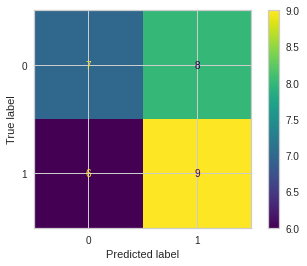

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,
                              display_labels=clf.classes_)
disp.plot()

plt.show()

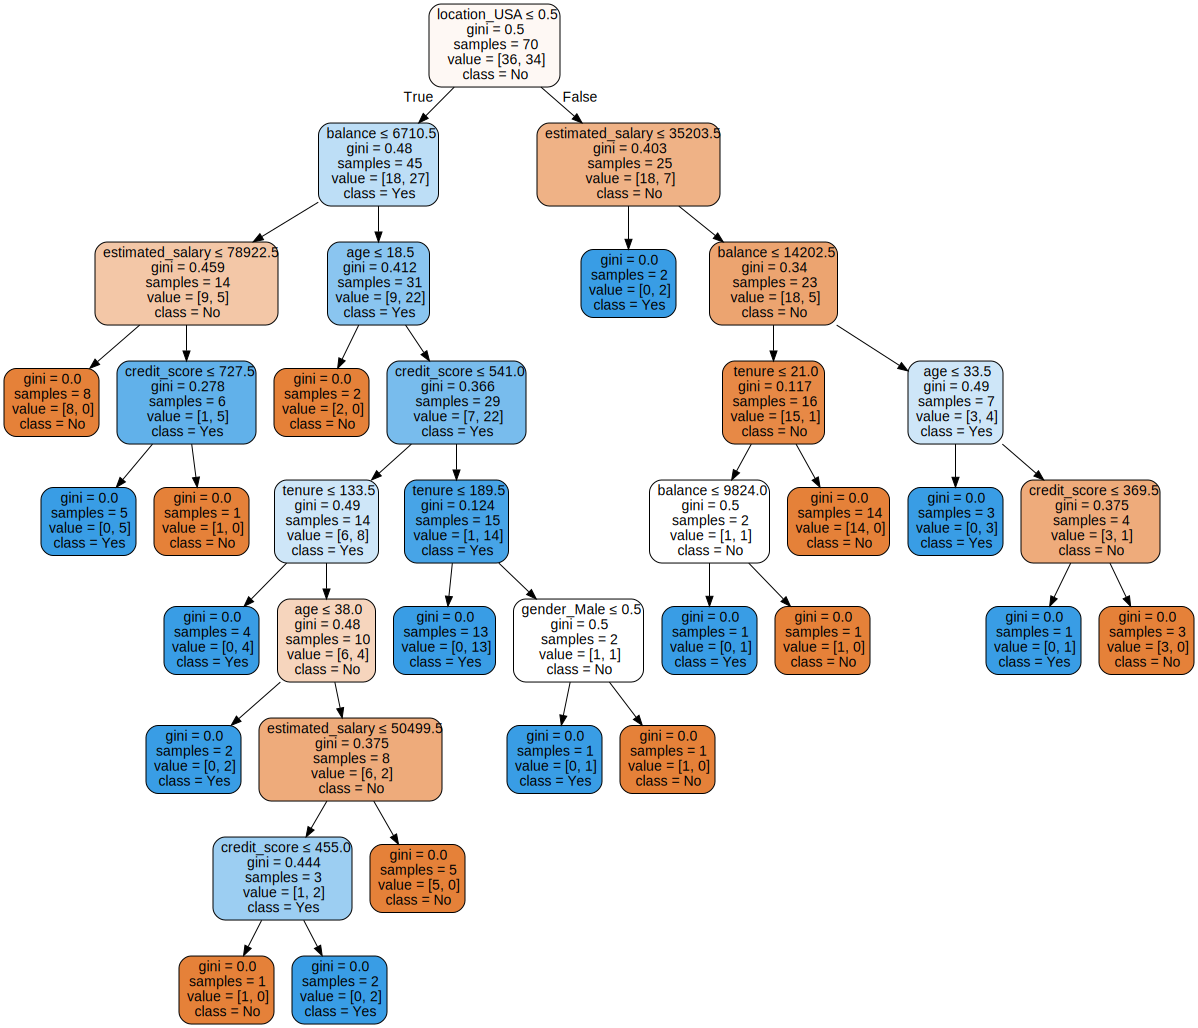

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Visualize the decision tree
dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=["No", "Yes"], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
# !pip install --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pycaret.classification import *
s = setup(df, target = 'churned')

,Description,Value
0,Session id,1190
1,Target,churned
2,Target type,Binary
3,Original data shape,"(100, 16)"
4,Transformed data shape,"(100, 20)"
5,Transformed train set shape,"(70, 20)"
6,Transformed test set shape,"(30, 20)"
7,Ordinal features,1
8,Numeric features,12
9,Categorical features,3


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.5429,0.5417,0.5000,0.5167,0.4745,0.0846,0.0909,0.2290
svm,SVM - Linear Kernel,0.5286,0.0000,0.5000,0.2571,0.3382,0.0000,0.0000,0.0730
qda,Quadratic Discriminant Analysis,0.5286,0.4750,0.3750,0.4900,0.4029,0.0828,0.0537,0.0680
gbc,Gradient Boosting Classifier,0.5143,0.5333,0.4500,0.4583,0.4381,0.0500,0.0583,0.1120
dummy,Dummy Classifier,0.5143,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1080
lightgbm,Light Gradient Boosting Machine,0.5000,0.3417,0.4500,0.4250,0.4257,-0.0413,-0.0560,0.1440
lr,Logistic Regression,0.4714,0.4417,0.4250,0.4300,0.4110,-0.0366,-0.0563,0.4190
et,Extra Trees Classifier,0.4571,0.4417,0.3917,0.4417,0.3840,-0.0635,-0.0879,0.2440
rf,Random Forest Classifier,0.4429,0.4208,0.3083,0.3833,0.3205,-0.0980,-0.0952,0.2060
ada,Ada Boost Classifier,0.4429,0.5417,0.2833,0.3333,0.2988,-0.1264,-0.1547,0.1890


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [ ]:
best


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

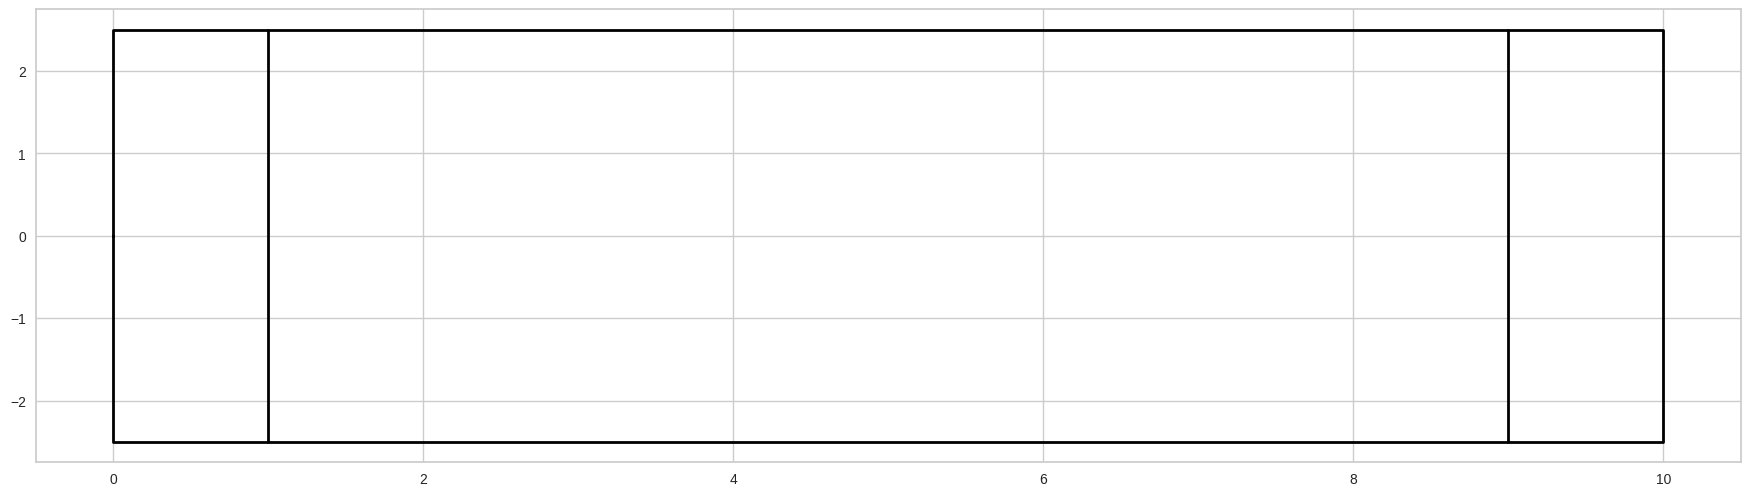

In [ ]:
evaluate_model(best)

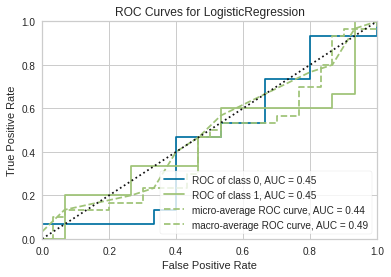

In [ ]:
plot_model(best)